### Expt 2
Predicting the Electricity Bill based on multiple features using Multivariate Linear Regression

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("electricity_bill.csv")

In [10]:
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


EDA

In [11]:
df.shape

(1000, 10)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(1000, 10)

In [14]:
df[df.isna()==False]
df.isna().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

In [15]:
df.dtypes

num_rooms               int64
num_people              int64
housearea             float64
is_ac                   int64
is_tv                   int64
is_flat                 int64
ave_monthly_income    float64
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object

In [16]:
df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


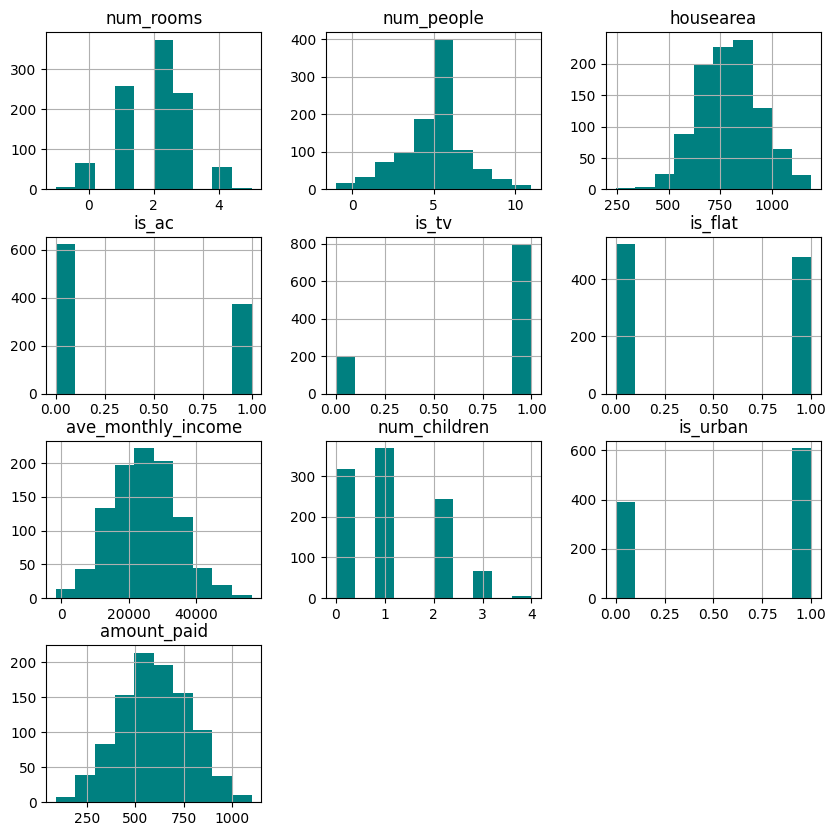

In [22]:
df.hist(figsize=(10,10), color='teal')
plt.title("Histogram Plot of the Features")
plt.show()

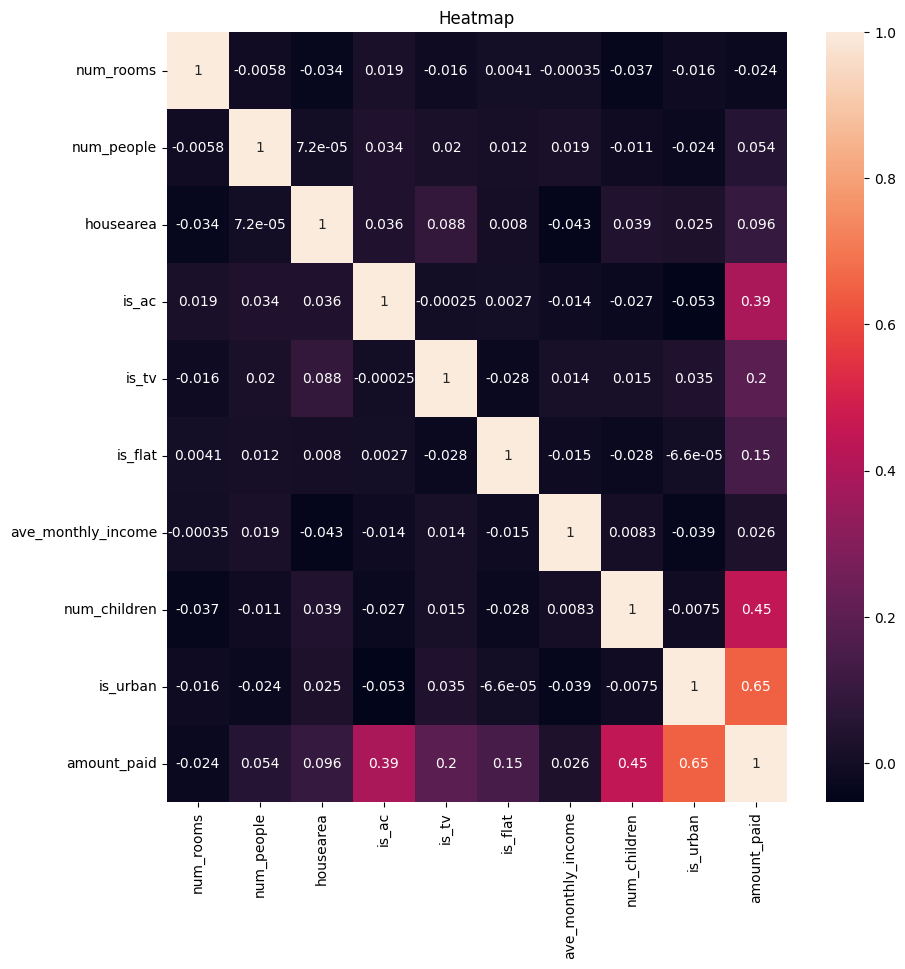

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

### Train-Test

In [25]:
df_features = df.drop(columns = ["amount_paid"])
df_target = df["amount_paid"]

In [26]:
df_features.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban
0,3,3,742.57,1,1,1,9675.93,2,0
1,1,5,952.99,0,1,0,35064.79,1,1
2,3,1,761.44,1,1,1,22292.44,0,0
3,0,5,861.32,1,1,0,12139.08,0,0
4,1,8,731.61,0,1,0,17230.10,2,1


In [27]:
df_target.head()

0    560.481447
1    633.283679
2    511.879157
3    332.992035
4    658.285625
Name: amount_paid, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

In [33]:
print("Training: ", X_train.shape, "   ", y_train.shape)
print("Testing: ",X_test.shape, "   ", y_test.shape)

Training:  (800, 9)     (800,)
Testing:  (200, 9)     (200,)


### Fitting Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression()

In [36]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr_model.predict(X_test)

### Accuracy of Model

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 3992.2427811817597
Mean Absolute Error (MAE): 53.737397747485595
R-squared: 0.8903766963611304
